# Biblioteka Qiskit wprowadzenie


```bash
python3 -m venv venv
source venv/bin/activate
# Scripts\Activate

pip install qiskit==1.2.1
pip install qiskit[visualization]
# pip install 'qiskit[visualization]'
pip install qiskit_aer==0.15.1
pip install qiskit-algorithms==0.3.0
pip install qiskit_machine_learning==0.7.2
pip install qiskit-finance==0.4.1
pip install qiskit-ibm-runtime==0.29.0
pip install qiskit-optimization==0.6.1
```
The other important libs.

```bash
pip install pylatexenc ipywidgets qutip
pip install scikit-learn numpy scipy matplotlib 
pip install ipython pandas sympy nose seaborn jupyter notebook jupyterlab
```

In [22]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

## Qiskit podstawy

Tworzenie rejestrów:

1. kwantowego `QuantumRegister` - do inicjalizowania kubitów. Kubity domyślnie inicjalizowane są w stanie $|0\rangle$
2. klasycznego `ClassicalRegister` do przechowywania wyników pomiarów kubitów. Po pomiarze otrzymywany wynik zawsze jest binarny $\{0,1\}$.

In [23]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

Oba rejestry wykorzystywane będą do generowania obwodów kwantowych `QuantumCircuit`.

Wszystkie podstawowe obiekty dostępne są bezpośrednio w bibliotece `qiskit`.

In [24]:
qreq = QuantumRegister(4) # rejest kwantowy z 4 qubitami

In [25]:
creg = ClassicalRegister(4) # rejestr klasyczny z 4 bitami

In [26]:
circuit = QuantumCircuit(qreq, creg) # obwód kwantowy z 4 qubitami i 4 bitami

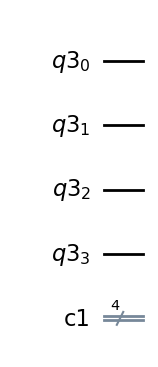

In [27]:
circuit.draw('mpl') # funkcja rysująca obwód

In [28]:
output = QuantumRegister(1) # inny rejestr kwantowy z 1 qubitem

In [29]:
circuit2 = QuantumCircuit(qreq, output, creg)

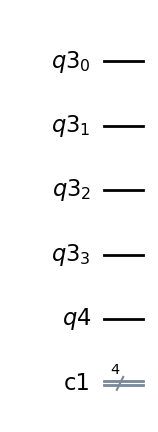

In [30]:
circuit2.draw("mpl")

In [31]:
circuit3 = QuantumCircuit(qreq)

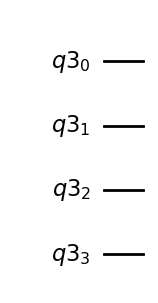

In [32]:
circuit3.draw('mpl')

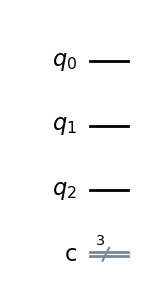

In [33]:
circuit4 = QuantumCircuit(3,3)
circuit4.draw("mpl")

In [34]:
from qiskit_aer.primitives import Sampler

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

bell = QuantumCircuit(2)
bell.h(0)
bell.measure_all()
 
# execute the quantum circuit
quasi_dists = Sampler().run(bell, shots=1000).result().quasi_dists[0]
print(quasi_dists)

{1: 0.503, 0: 0.497}


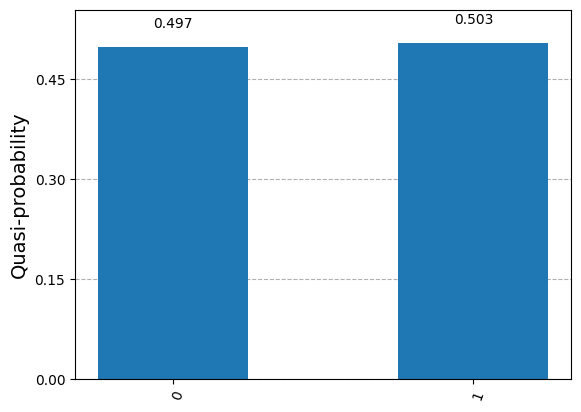

In [35]:
plot_histogram(quasi_dists)

### Pomiar w obwodzie i wielokrotne uruchamianie układu

## Tworzenie stanu jednokubitowego 


$$
\ket{\psi}=\ket{0}
$$

Do inspekcji stanu układu (bez jego pomiaru) mozemy uzyć backend `statevector_simulator`.

In [36]:
from math import pi
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
 
# Create a Bell state for demonstration
qc = QuantumCircuit(1)
psi = Statevector(qc)

In [37]:
psi.draw('latex') # metoda wypisująca wektor stanu w latexu

<IPython.core.display.Latex object>

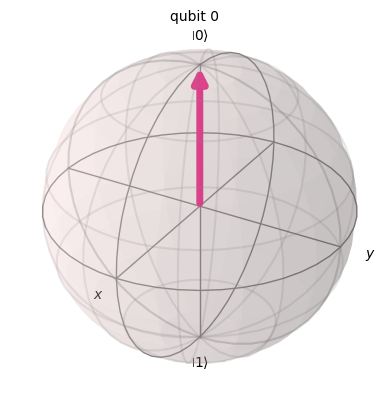

In [38]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(psi)

In [39]:
qc = QuantumCircuit(1)
qc.h(0)
state = Statevector(qc)
state.draw('latex')

<IPython.core.display.Latex object>

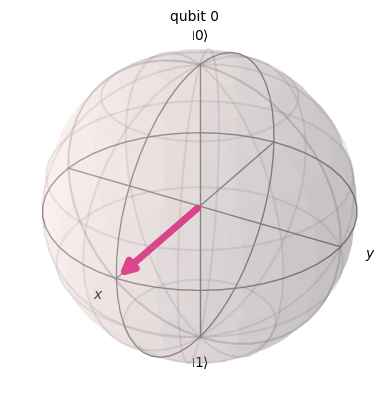

In [40]:
plot_bloch_multivector(state)

### inicjalizacja stanu


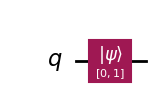

In [41]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
initial_state = [0,1]
qc.initialize(initial_state, 0)
qc.draw('mpl')

In [42]:
state = Statevector(qc)
state.draw('latex')

<IPython.core.display.Latex object>

In [43]:
initial_state = [1,1]
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
result.draw('latex')

QiskitError: 'Sum of amplitudes-squared is not 1, but 1.4142135623730951.'

In [44]:
from math import sqrt
initial_state = [1/sqrt(2),1/sqrt(2)]
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
result = Statevector(qc)
result.draw('latex')

<IPython.core.display.Latex object>

In [45]:
from math import sqrt
initial_state = [1/2,sqrt(3)/2]
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
result = Statevector(qc)
result.draw('latex')

<IPython.core.display.Latex object>

In [46]:
from math import pi, cos, sin 
def get_state(theta):
    return [cos(theta/2), sin(theta/2)]

theta = -pi/2

qc = QuantumCircuit(1)
qc.initialize(get_state(theta), 0)
result = Statevector(qc)
result.draw('latex')

<IPython.core.display.Latex object>

In [47]:
# execute the quantum circuit
qc.measure_all()
quasi_dists = Sampler().run(qc, shots=1000).result().quasi_dists[0]
print(quasi_dists)

{0: 0.523, 1: 0.477}


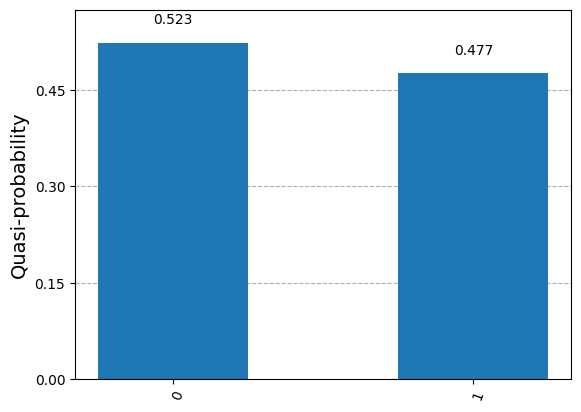

In [48]:
plot_histogram(quasi_dists)

## Tworzenie stanu dwukubitowego
 

$$
\ket{00}, \ket{01}, \ket{10}, \ket{11}
$$


In [49]:
qc = QuantumCircuit(2)
result = Statevector(qc)
result.draw('latex')

<IPython.core.display.Latex object>

In [50]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
result = Statevector(qc)
result.draw('latex')

<IPython.core.display.Latex object>

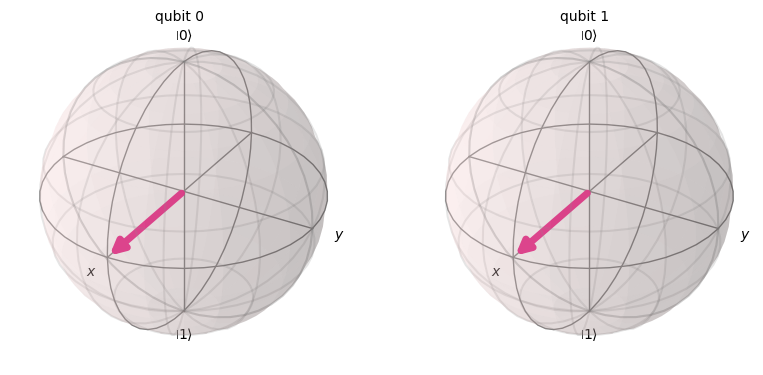

In [53]:
plot_bloch_multivector(result)

In [54]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
result = Statevector(qc)
result.draw('latex')


<IPython.core.display.Latex object>

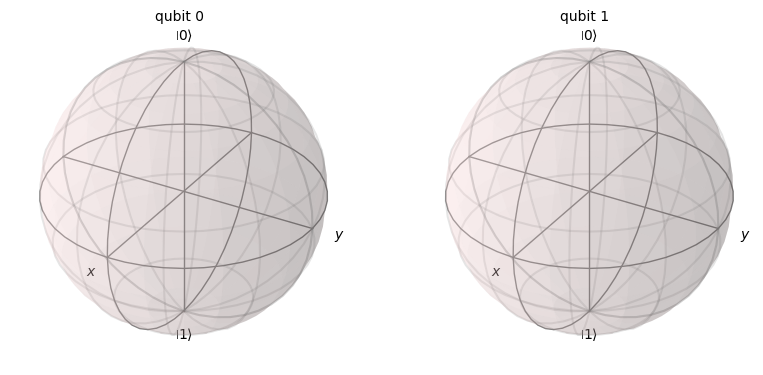

In [55]:
plot_bloch_multivector(result)

## Tworzenie stanu trzy-kubitowego 

$$
\ket{000}, \ket{001}, \ket{010}, \ket{011}, \ket{100}, \ket{101}, \ket{110}, \ket{111}$$

In [59]:
qc = QuantumCircuit(3)
qc.x(0) # uwaga 0 wy kubit jest oznaczony od w stanie od prawej - nie od lewej (jak index)
#qc.x(1)
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

Uruchom powyższy kod usuwajac poszczegolne komentarze i sprawdz wynik.


In [62]:
from qiskit.visualization import circuit_drawer

q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.h(0)
circuit.measure(q, c)
circuit_drawer(circuit)

┌───┐┌─┐
  q7: ┤ H ├┤M├
      └───┘└╥┘
c4: 1/══════╩═
            0